# DS-SF-34 | 08 | Linear Regression, Part 2 | Assignment | Starter Code

In [1]:
import os

import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

In [4]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-08-advertising.csv'))

In [5]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
193,38.2,3.7,13.8,7.6
194,94.2,4.9,8.1,9.7
195,177.0,9.3,6.4,12.8
196,283.6,42.0,66.2,25.5


We have 198 observations in this outlier-free dataset.  Each observation records the budget used to run ads on TV, on radio, and in the newspapers (in thousands of dollars) as well as the sale figures (also in thousands of dollars).

Today, we are going to study if we can predict sales based on the amount of advertising.

> ## Question 1.  How are the different variables correlated?

In [6]:
# TODO
df.corr()
# low correlation between (newspaper and radio) and (TV and radio) and (TV and newspaper).  
# Higher correlation between Sales and TV.

,TV,Radio,Newspaper,Sales
TV,1.000000,0.051978,0.049771,0.779121
Radio,0.051978,1.000000,0.346364,0.576748
Newspaper,0.049771,0.346364,1.000000,0.219555
Sales,0.779121,0.576748,0.219555,1.000000


Answer: TODO

> ## Question 2.  Draw a scatter plot between `TV` (horizontal axis) and `Sales` (vertical axis).

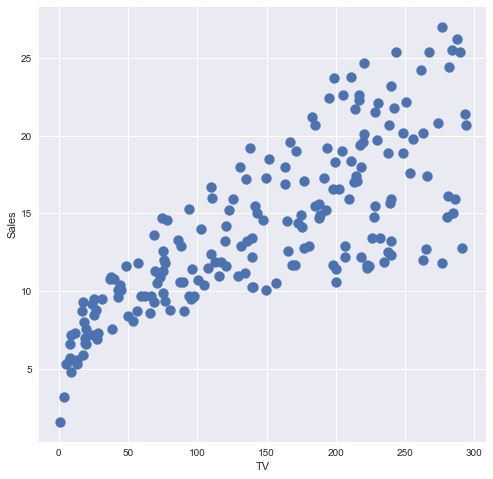

In [7]:
# TODO
df.plot(kind = 'scatter', x = 'TV', y = 'Sales', s = 100, figsize = (8, 8))   

> ## Question 3.  Using _seaborn_, draw the same scatter plot along with a fitted line between `TV` and `Sales`.

- (http://seaborn.pydata.org/generated/seaborn.lmplot.html)

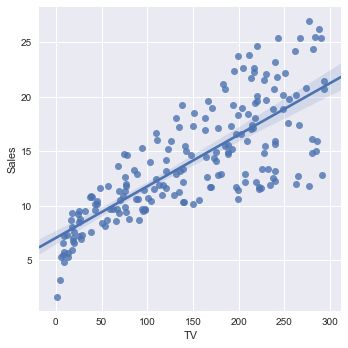

In [8]:
# TODO
sns.lmplot(x="TV", y="Sales", data=df)

> ## Question 4.  Estimate a simple linear regression between `TV` (explanatory variable) and `Sales` (response variable).

In [10]:
# TODO
model = smf.ols(formula = 'Sales ~ TV', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     302.8
Date:                Sat, 20 May 2017   Prob (F-statistic):           1.29e-41
Time:                        15:20:41   Log-Likelihood:                -514.27
No. Observations:                 198   AIC:                             1033.
Df Residuals:                     196   BIC:                             1039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0306      0.462     15.219      0.000         6.120     7.942
TV             0.0474      0.003     17.400      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.404   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.551
Skew:                          -0.062   Prob(JB):                        0.759
Kurtosis:                       2.774   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ## Question 5.  Interpret the coefficients.  Are they significant?  What equation did you derive?

Answer: TODO
The coefficients are significant.  Sales = 7.0306 + .0474*TV
For each increase of $1K in TV ads, Sales increase by .0474K = $47

> ## Question 6.  How are the residual distributed?  Do they follow the linear modeling assumptions?

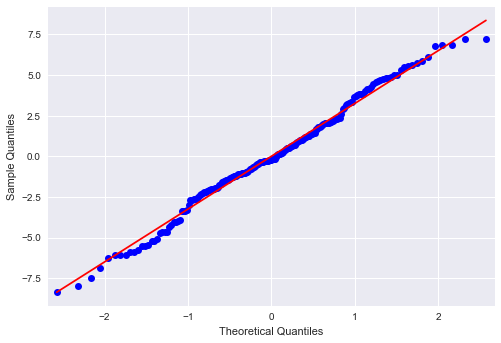

In [11]:
# TODO  yes residuals are normally distributed
sm.qqplot(model.resid, line = 's')
pass


Answer: TODO

> ## Question 7.  Estimate two new simple linear regression models: (1) `Sales` against `Radio` and (2) `Sales` against `Newspaper`.

In [12]:
# TODO
model = smf.ols(formula = 'Sales ~ Radio', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     97.69
Date:                Sat, 20 May 2017   Prob (F-statistic):           5.99e-19
Time:                        15:22:26   Log-Likelihood:                -566.70
No. Observations:                 198   AIC:                             1137.
Df Residuals:                     196   BIC:                             1144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.3166      0.560     16.622      0.000         8.211    10.422
Radio          0.2016      0.020      9.884      0.000         0.161     0.242
==============================================================================
Omnibus:                       20.193   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.115
Skew:                          -0.785   Prob(JB):                     9.56e-06
Kurtosis:                       3.582   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# TODO
model = smf.ols(formula = 'Sales ~ Newspaper', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     9.927
Date:                Sat, 20 May 2017   Prob (F-statistic):            0.00188
Time:                        15:22:29   Log-Likelihood:                -601.84
No. Observations:                 198   AIC:                             1208.
Df Residuals:                     196   BIC:                             1214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.3193      0.639     19.274      0.000        11.059    13.580
Newspaper      0.0558      0.018      3.151      0.002         0.021     0.091
==============================================================================
Omnibus:                        5.835   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.303
Skew:                           0.333   Prob(JB):                       0.0706
Kurtosis:                       2.555   Cond. No.                         63.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ## Question 8.  What can you conclude of these two new models against the first one?

Answer: TODO

The latter models are worse than the first one.  We can compare the R^2 statistic here, because we have only one variable each.

> ## Question 9.  Run a multiple linear regression using `TV`, `Radio`, and `Newspaper` as explanatory variables.

In [16]:
# TODO
model = smf.ols(formula = 'Sales ~ TV + Radio + Newspaper', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Sat, 20 May 2017   Prob (F-statistic):           8.35e-95
Time:                        15:25:23   Log-Likelihood:                -383.24
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9523      0.318      9.280      0.000         2.325     3.580
TV             0.0457      0.001     32.293      0.000         0.043     0.048
Radio          0.1886      0.009     21.772      0.000         0.171     0.206
Newspaper     -0.0012      0.006     -0.187      0.852        -0.014     0.011
==============================================================================
Omnibus:                       59.593   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.654
Skew:                          -1.324   Prob(JB):                     8.66e-33
Kurtosis:                       6.299   Cond. No.                         457.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ## Question 10.  What are your findings?

Answer: TODO

All but newspaper are significant.  This is the best model